In [5]:
# Task 1

import pandas as pd
import numpy as np


file_path = "/content/customer_info.csv"
df = pd.read_csv(file_path)

file_path = "/content/product_info.csv"
df = pd.read_csv(file_path)

file_path = "/content/sales_data.csv"
df = pd.read_csv(file_path)

In [7]:
df.head()


,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
0,O966977,C00397,P0022,3,39.25,06-07-2025,Delivered,PayPal,Central,0.00
1,O696648,C00236,P0023,5,18.92,06-07-2025,DELAYED,credit card,North,0.00
2,O202644,C00492,P0011,1,29.68,07-07-2025,delivered,Bank Transfer,North,0.15
3,O501803,C00031,P0003,1,32.76,08-07-2025,Cancelled,Credit Card,Central,0.20
4,O322242,C00495,P0016,1,47.62,08-07-2025,DELAYED,Credit Card,West,0.20


In [10]:
#Task 2
import pandas as pd

# Loading the dataframes explicitly here to ensure they are defined
customer_df = pd.read_csv("/content/customer_info.csv")
product_df = pd.read_csv("/content/product_info.csv")
sales_df = pd.read_csv("/content/sales_data.csv")


customer_df['gender'] = customer_df['gender'].str.strip().str.title()
customer_df['region'] = customer_df['region'].str.strip().str.title()
customer_df['loyalty_tier'] = customer_df['loyalty_tier'].str.strip().str.title()


customer_df['gender'] = customer_df['gender'].replace({
    'Femle': 'Female',
    'Femle ': 'Female',
    'Male ': 'Male'
})

customer_df['loyalty_tier'] = customer_df['loyalty_tier'].replace({
    'Gld': 'Gold',
    'Brnze': 'Bronze',
    'Sllver': 'Silver'
})


product_df['category'] = product_df['category'].str.strip().str.title()
product_df['supplier_code'] = product_df['supplier_code'].str.strip()


sales_df['delivery_status'] = sales_df['delivery_status'].str.strip().str.title()
sales_df['payment_method'] = sales_df['payment_method'].str.strip().str.title()
sales_df['region'] = sales_df['region'].str.strip().str.title()

In [12]:
date_cols = {
    'order_date': 'sales_df',
    'signup_date': 'customer_df',
    'launch_date': 'product_df'
}

sales_df['order_date'] = pd.to_datetime(sales_df['order_date'], errors='coerce')
customer_df['signup_date'] = pd.to_datetime(customer_df['signup_date'], errors='coerce')
product_df['launch_date'] = pd.to_datetime(product_df['launch_date'], errors='coerce')


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          2999 non-null   object 
 1   customer_id       2998 non-null   object 
 2   product_id        2995 non-null   object 
 3   quantity          2997 non-null   object 
 4   unit_price        2999 non-null   float64
 5   order_date        2998 non-null   object 
 6   delivery_status   2997 non-null   object 
 7   payment_method    2997 non-null   object 
 8   region            3000 non-null   object 
 9   discount_applied  2483 non-null   float64
dtypes: float64(2), object(8)
memory usage: 234.5+ KB


In [15]:
# Filling missing discount with 0
if 'discount_applied' in sales_df.columns:
    sales_df['discount_applied'] = sales_df['discount_applied'].fillna(0)

# Filling missing categories
customer_df['gender'] = customer_df['gender'].fillna("Unknown")
customer_df['region'] = customer_df['region'].fillna("Unknown")
customer_df['loyalty_tier'] = customer_df['loyalty_tier'].fillna("Unknown")

sales_df['region'] = sales_df['region'].fillna("Unknown")
sales_df['delivery_status'] = sales_df['delivery_status'].fillna("Unknown")

# Droping duplicates
customer_df = customer_df.drop_duplicates(subset='customer_id')
product_df = product_df.drop_duplicates(subset='product_id')
sales_df = sales_df.drop_duplicates(subset='order_id')


In [16]:
print("\n--- Missing values after cleaning ---")
print("Customer DataFrame Missing Values:\n", customer_df.isnull().sum())
print("\nProduct DataFrame Missing Values:\n", product_df.isnull().sum())
print("\nSales DataFrame Missing Values:\n", sales_df.isnull().sum())

print("\n--- Unique values for cleaned categorical columns in customer_df ---")
print("Gender unique values:\n", customer_df['gender'].unique())
print("Region unique values:\n", customer_df['region'].unique())
print("Loyalty Tier unique values:\n", customer_df['loyalty_tier'].unique())

print("\n--- Unique values for cleaned categorical columns in product_df ---")
print("Category unique values:\n", product_df['category'].unique())

print("\n--- Unique values for cleaned categorical columns in sales_df ---")
print("Delivery Status unique values:\n", sales_df['delivery_status'].unique())
print("Payment Method unique values:\n", sales_df['payment_method'].unique())
print("Region unique values:\n", sales_df['region'].unique())

print("\n--- DataFrame Info after cleaning and type conversion ---")
print("\nCustomer DataFrame Info:")
customer_df.info()
print("\nProduct DataFrame Info:")
product_df.info()
print("\nSales DataFrame Info:")
sales_df.info()


--- Missing values after cleaning ---
Customer DataFrame Missing Values:
 customer_id     1
email           6
signup_date     4
gender          0
region          0
loyalty_tier    0
dtype: int64

Product DataFrame Missing Values:
 product_id       0
product_name     0
category         0
launch_date      0
base_price       0
supplier_code    0
dtype: int64

Sales DataFrame Missing Values:
 order_id               1
customer_id            2
product_id             5
quantity               3
unit_price             1
order_date          1818
delivery_status        0
payment_method         3
region                 0
discount_applied       0
dtype: int64

--- Unique values for cleaned categorical columns in customer_df ---
Gender unique values:
 ['Male' 'Female' 'Other' 'Unknown']
Region unique values:
 ['Central' 'West' 'North' 'South' 'East' 'Unknown']
Loyalty Tier unique values:
 ['Silver' 'Gold' 'Bronze' 'Unknown']

--- Unique values for cleaned categorical columns in product_df ---
Categ

In [20]:
numeric_cols = ['quantity', 'unit_price', 'discount_applied']

# Convert 'quantity' to numeric, coercing errors to NaN
# Then drop rows where quantity became NaN, as the filter expects valid numbers
if 'quantity' in sales_df.columns:
    sales_df['quantity'] = pd.to_numeric(sales_df['quantity'], errors='coerce')
    sales_df.dropna(subset=['quantity'], inplace=True)

for col in numeric_cols:
    if col in sales_df.columns:
        sales_df = sales_df[sales_df[col] >= 0]

In [21]:
#Task 3

merged_df = sales_df.merge(product_df, on='product_id', how='left')
merged_df = merged_df.merge(customer_df, on='customer_id', how='left')

merged_df.info()
merged_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2992 entries, 0 to 2991
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          2991 non-null   object        
 1   customer_id       2990 non-null   object        
 2   product_id        2987 non-null   object        
 3   quantity          2992 non-null   float64       
 4   unit_price        2992 non-null   float64       
 5   order_date        1176 non-null   datetime64[ns]
 6   delivery_status   2992 non-null   object        
 7   payment_method    2989 non-null   object        
 8   region_x          2992 non-null   object        
 9   discount_applied  2992 non-null   float64       
 10  product_name      2987 non-null   object        
 11  category          2987 non-null   object        
 12  launch_date       2987 non-null   datetime64[ns]
 13  base_price        2987 non-null   float64       
 14  supplier_code     2987 n

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region_x,discount_applied,product_name,category,launch_date,base_price,supplier_code,email,signup_date,gender,region_y,loyalty_tier
0,O966977,C00397,P0022,3.0,39.25,2025-06-07,Delivered,Paypal,Central,0.00,Cleaning Product 86,Cleaning,2024-04-10,19.77,S924,jacquelinemartin@mills-logan.com,2024-08-09,Female,North,Silver
1,O696648,C00236,P0023,5.0,18.92,2025-06-07,Delayed,Credit Card,North,0.00,Outdoors Product 32,Outdoors,2025-01-18,36.04,S907,georgeweber@morgan.com,2024-06-08,Other,North,Gold
2,O202644,C00492,P0011,1.0,29.68,2025-07-07,Delivered,Bank Transfer,North,0.15,Kitchen Product 53,Kitchen,2025-03-25,11.08,S645,lcook@walters-smith.com,2024-09-25,Male,Central,Gold
3,O501803,C00031,P0003,1.0,32.76,2025-08-07,Cancelled,Credit Card,Central,0.20,Cleaning Product 85,Cleaning,2024-07-15,7.92,S745,smoore@gmail.com,2024-07-28,Female,Central,Gold
4,O322242,C00495,P0016,1.0,47.62,2025-08-07,Delayed,Credit Card,West,0.20,Cleaning Product 53,Cleaning,2025-02-20,26.71,S715,mcclainkatherine@hotmail.com,2024-09-18,Male,Central,Gold


In [22]:
#Task 4

# Revenue
merged_df['revenue'] = merged_df['quantity'] * merged_df['unit_price'] * (1 - merged_df['discount_applied'])

# Order week
merged_df['order_week'] = merged_df['order_date'].dt.isocalendar().week

# Price band
merged_df['price_band'] = pd.cut(
    merged_df['unit_price'],
    bins=[0, 15, 30, 1000],
    labels=['Low', 'Medium', 'High']
)

# Days to order
merged_df['days_to_order'] = (merged_df['order_date'] - merged_df['launch_date']).dt.days

# Email domain
merged_df['email_domain'] = merged_df['email'].str.split('@').str[-1]

# Late delivery flag
merged_df['is_late'] = merged_df['delivery_status'] == "Delayed"


In [23]:
print("\n--- Merged DataFrame Info ---")
merged_df.info()
print("\n--- Merged DataFrame Head ---")
merged_df.head()


--- Merged DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2992 entries, 0 to 2991
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          2991 non-null   object        
 1   customer_id       2990 non-null   object        
 2   product_id        2987 non-null   object        
 3   quantity          2992 non-null   float64       
 4   unit_price        2992 non-null   float64       
 5   order_date        1176 non-null   datetime64[ns]
 6   delivery_status   2992 non-null   object        
 7   payment_method    2989 non-null   object        
 8   region_x          2992 non-null   object        
 9   discount_applied  2992 non-null   float64       
 10  product_name      2987 non-null   object        
 11  category          2987 non-null   object        
 12  launch_date       2987 non-null   datetime64[ns]
 13  base_price        2987 non-null   float64      

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region_x,discount_applied,...,signup_date,gender,region_y,loyalty_tier,revenue,order_week,price_band,days_to_order,email_domain,is_late
0,O966977,C00397,P0022,3.0,39.25,2025-06-07,Delivered,Paypal,Central,0.00,...,2024-08-09,Female,North,Silver,117.750,23,High,423.0,mills-logan.com,False
1,O696648,C00236,P0023,5.0,18.92,2025-06-07,Delayed,Credit Card,North,0.00,...,2024-06-08,Other,North,Gold,94.600,23,Medium,140.0,morgan.com,True
2,O202644,C00492,P0011,1.0,29.68,2025-07-07,Delivered,Bank Transfer,North,0.15,...,2024-09-25,Male,Central,Gold,25.228,28,Medium,104.0,walters-smith.com,False
3,O501803,C00031,P0003,1.0,32.76,2025-08-07,Cancelled,Credit Card,Central,0.20,...,2024-07-28,Female,Central,Gold,26.208,32,High,388.0,gmail.com,False
4,O322242,C00495,P0016,1.0,47.62,2025-08-07,Delayed,Credit Card,West,0.20,...,2024-09-18,Male,Central,Gold,38.096,32,High,168.0,hotmail.com,True


In [25]:
#Task 5

weekly_revenue = merged_df.groupby(['order_week', 'region_x'])['revenue'].sum().reset_index()
weekly_revenue.head()

,order_week,region_x,revenue
0,1,East,173.8310
1,1,North,20.7825
2,1,South,55.8790
3,1,West,325.3200
4,2,Central,2248.1720


In [27]:
# Product category performance

In [26]:
category_perf = merged_df.groupby('category').agg(
    total_revenue=('revenue', 'sum'),
    total_quantity=('quantity', 'sum'),
    avg_discount=('discount_applied', 'mean')
).reset_index()

category_perf



,category,total_revenue,total_quantity,avg_discount
0,Cleaning,93621.7840,3584.0,0.085566
1,Kitchen,33933.6760,1226.0,0.075622
2,Outdoors,40062.0680,1519.0,0.082016
3,Personal Care,24916.6365,902.0,0.086755
4,Storage,46931.4575,1730.0,0.081043


In [28]:
merged_df['signup_month'] = merged_df['signup_date'].dt.month

loyalty_behaviour = merged_df.groupby(['loyalty_tier', 'signup_month']).agg(
    total_orders=('order_id', 'count'),
    total_revenue=('revenue', 'sum')
).reset_index()

loyalty_behaviour


,loyalty_tier,signup_month,total_orders,total_revenue
0,Bronze,1.0,40,2510.6410
1,Bronze,2.0,63,4700.2225
2,Bronze,3.0,57,5188.6820
3,Bronze,4.0,28,2050.6545
4,Bronze,5.0,41,3244.4745
5,Bronze,6.0,81,6053.9165
6,Bronze,7.0,47,3262.1595
7,Bronze,8.0,49,4445.3610
8,Bronze,9.0,33,2685.6645
9,Bronze,10.0,73,6084.2280


In [41]:
delivery_perf = merged_df.groupby(['region_x', 'price_band']).agg(
    late_rate=('is_late', 'mean'),
    total_orders=('order_id', 'count')
).reset_index()

delivery_perf

/tmp/ipython-input-1778058548.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delivery_perf = merged_df.groupby(['region_x', 'price_band']).agg(


,region_x,price_band,late_rate,total_orders
0,Central,Low,0.380531,113
1,Central,Medium,0.391111,225
2,Central,High,0.393939,264
3,East,Low,0.416667,96
4,East,Medium,0.421941,237
5,East,High,0.409774,266
6,North,Low,0.383178,107
7,North,Medium,0.441176,204
8,North,High,0.361775,293
9,Nrth,Low,NaN,0


In [34]:
payment_pref = merged_df.groupby(['loyalty_tier', 'payment_method']).size().reset_index(name='count')
payment_pref


,loyalty_tier,payment_method,count
0,Bronze,Bank Transfer,179
1,Bronze,Credit Card,284
2,Bronze,Paypal,164
3,Gold,Bank Transfer,403
4,Gold,Bank Transfr,1
5,Gold,Credit Card,840
6,Gold,Paypal,429
7,Silver,Bank Transfer,190
8,Silver,Credit Card,304
9,Silver,Paypal,162


In [35]:
#Task 6

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

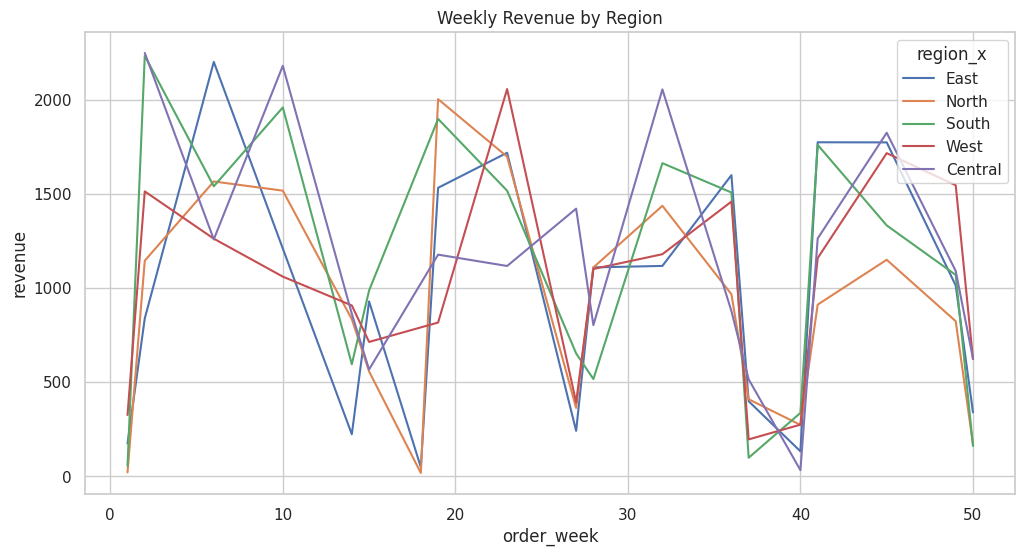

In [42]:
plt.figure(figsize=(12,6))
sns.lineplot(data=weekly_revenue, x='order_week', y='revenue', hue='region_x')
plt.title("Weekly Revenue by Region")
plt.show()

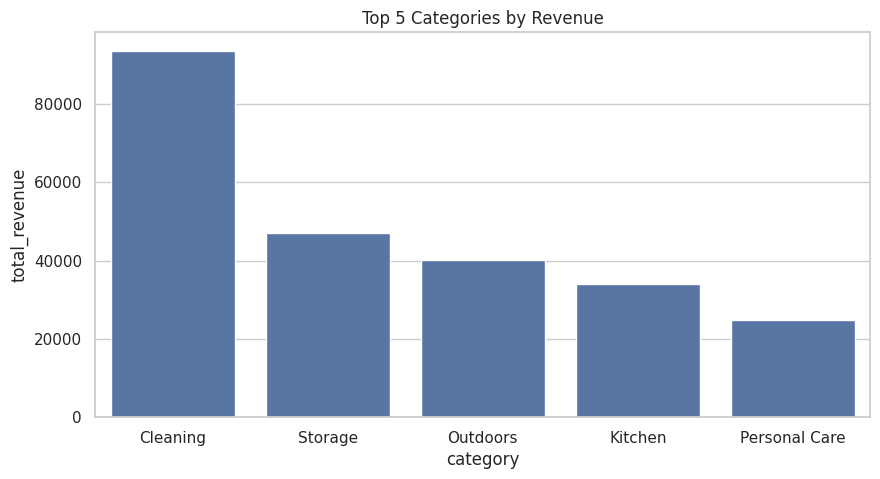

In [43]:
top5 = category_perf.sort_values('total_revenue', ascending=False).head(5)

plt.figure(figsize=(10,5))
sns.barplot(data=top5, x='category', y='total_revenue')
plt.title("Top 5 Categories by Revenue")
plt.show()


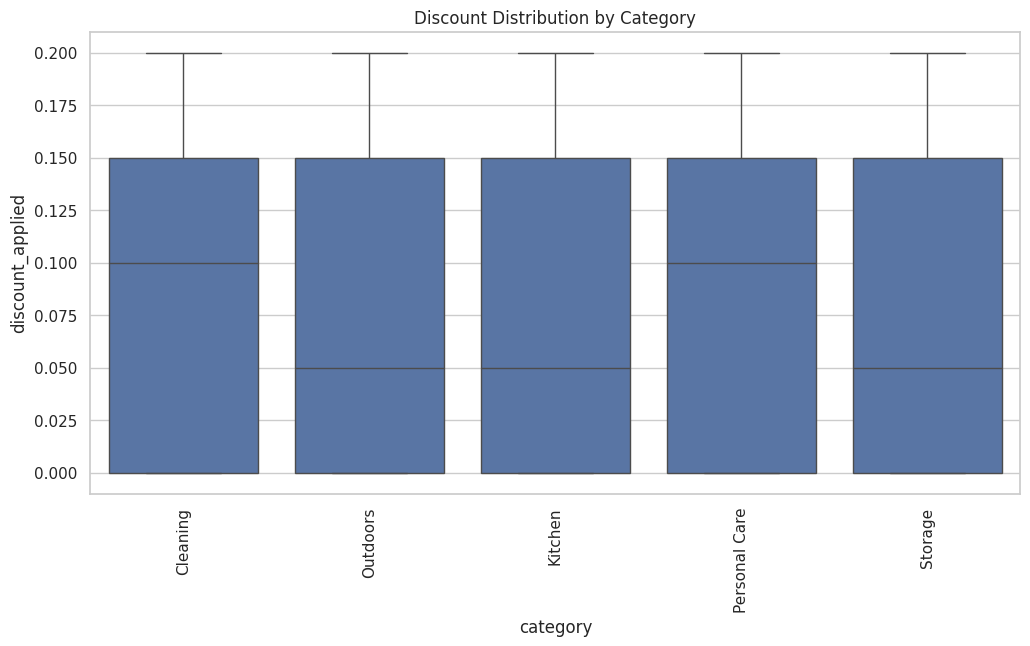

In [45]:
plt.figure(figsize=(12,6))
sns.boxplot(data=merged_df, x='category', y='discount_applied')
plt.xticks(rotation=90)
plt.title("Discount Distribution by Category")
plt.show()



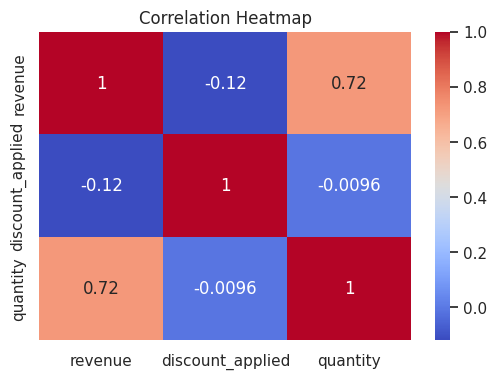

In [46]:
plt.figure(figsize=(6,4))
sns.heatmap(merged_df[['revenue','discount_applied','quantity']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


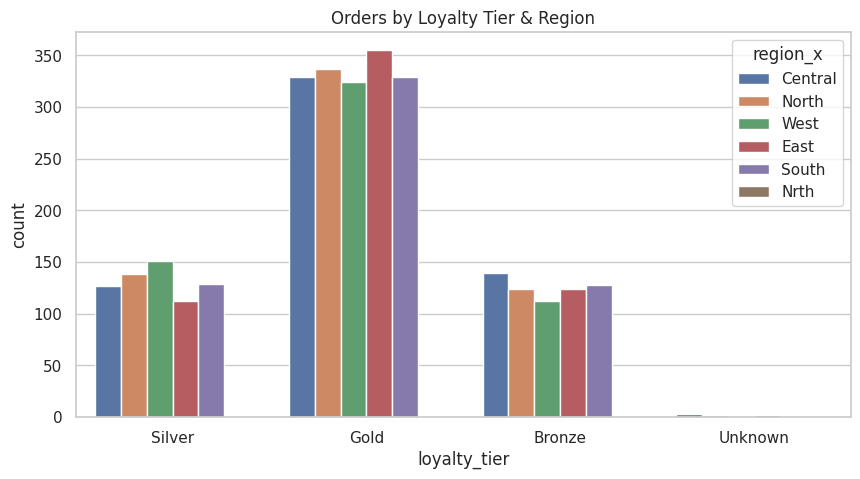

In [49]:
plt.figure(figsize=(10,5))
sns.countplot(data=merged_df, x='loyalty_tier', hue='region_x')
plt.title("Orders by Loyalty Tier & Region")
plt.show()


/tmp/ipython-input-3221468646.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delivery_stack = merged_df.groupby(['price_band','delivery_status']).size().unstack(fill_value=0)


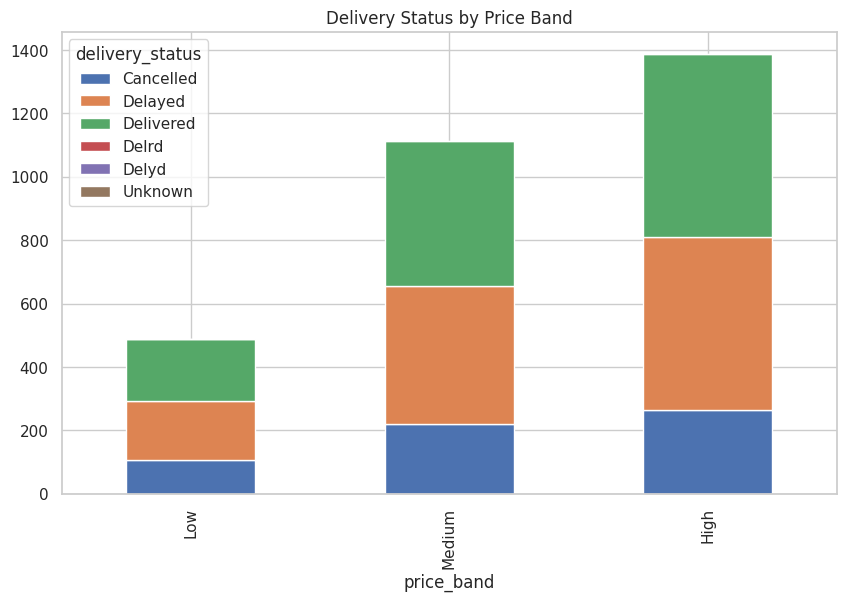

In [50]:
delivery_stack = merged_df.groupby(['price_band','delivery_status']).size().unstack(fill_value=0)

delivery_stack.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Delivery Status by Price Band")
plt.show()
